# 기계학습 (60점)

## 비트코인 데이터

데이터 경로 : './data/bitcoin_mock.csv'

1분간격의 비트코인 가격에 대한 정보이다. 
- datetime: 1분 단위의 데이터
- open : 시작가
- high : 최고가
- low : 최저가
- close : 종가
- volume : 거래량

In [6]:
# 필요한 라이브러리 import
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
import pandas as pd
df =pd.read_csv('../dataset/bitcoin_mock.csv')
df.head()

,datetime,open,high,low,close,volume
0,2022-01-01 00:00:00,46216.93,46271.08,46208.37,46250.00,40.57574
1,2022-01-01 00:01:00,46250.00,46344.23,46234.39,46312.76,42.38106
2,2022-01-01 00:02:00,46312.76,46381.69,46292.75,46368.73,51.29955
3,2022-01-01 00:03:00,46368.73,46391.49,46314.26,46331.08,30.45894
4,2022-01-01 00:04:00,46331.07,46336.10,46300.00,46321.34,20.96029


### 기계학습1
모든 데이터 행이 1분간격으로 존재하는지 확인하고 그렇지 않은 경우 누락된 시각의 행을 생성하고 컬럼들의 결측치를 적절히 생성하라.      
결측치가 존재한다면 결측치를 처리하라

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])
time_diff = df['datetime'].diff()
# 1분이 아닌 간격 찾기
non_one_minute = df[time_diff != pd.Timedelta(minutes=1)]
non_one_minute

,datetime,open,high,low,close,volume
0,2022-01-01 00:00:00,46216.93,46271.08,46208.37,46250.00,40.57574
21440,2022-01-15 21:21:00,43453.43,43456.00,43443.16,43452.27,9.22327
21757,2022-01-16 02:39:00,43010.02,43017.88,43000.00,43000.00,11.51053
73347,2022-02-20 22:30:00,38311.35,38311.35,38303.98,38307.70,2.88170
117580,2022-03-23 15:44:00,42634.99,42674.54,42633.73,42674.53,30.56972
128033,2022-03-30 21:58:00,46961.50,46964.52,46956.57,46961.51,12.42207
148204,2022-04-13 22:10:00,41184.35,41205.56,41170.17,41205.55,15.66562
167296,2022-04-27 04:23:00,38389.85,38389.85,38372.90,38384.24,8.86209
176478,2022-05-03 13:26:00,38407.10,38407.11,38311.00,38349.14,137.07265
188309,2022-05-11 18:38:00,30181.90,30200.00,30104.14,30113.44,56.97588


In [9]:
# 완전한 1분 간격의 시간 범위 생성
full_range = pd.date_range(start=df['datetime'].min(), end=df['datetime'].max(), freq='1T')

# 데이터프레임을 완전한 시간 범위로 재인덱싱
df_reindexed = df.set_index('datetime').reindex(full_range)

# 결측치 처리 함수
def fill_missing_values(df):
    df['open'] = df['open'].fillna(method='ffill') # 이전 값으로 채우기 (forward fill)
    df['close'] = df['close'].fillna(method='ffill') 
    df['high'] = df['high'].fillna(method='ffill')  
    df['low'] =df['low'].fillna(method='ffill')  
    df['volume'] = df['volume'].fillna(0)# 'volume' 컬럼: 0으로 채우기
    return df

# 결측치 처리 적용
df_f = fill_missing_values(df_reindexed)

# 인덱스를 다시 컬럼으로 변환
df_f = df_f.reset_index().rename(columns={'index': 'datetime'})

print("\n처리 후 데이터:")
display(df_f)
# 결측치가 모두 처리되었는지 확인
print("\n결측치 확인:")
display(df_f.isnull().sum())


처리 후 데이터:


,datetime,open,high,low,close,volume
0,2022-01-01 00:00:00,46216.93,46271.08,46208.37,46250.00,40.57574
1,2022-01-01 00:01:00,46250.00,46344.23,46234.39,46312.76,42.38106
2,2022-01-01 00:02:00,46312.76,46381.69,46292.75,46368.73,51.29955
3,2022-01-01 00:03:00,46368.73,46391.49,46314.26,46331.08,30.45894
4,2022-01-01 00:04:00,46331.07,46336.10,46300.00,46321.34,20.96029
...,...,...,...,...,...,...
613148,2023-03-02 19:08:00,23476.11,23495.61,23467.11,23475.35,339.17422
613149,2023-03-02 19:09:00,23475.35,23484.00,23456.38,23460.44,292.23280
613150,2023-03-02 19:10:00,23460.44,23484.83,23460.44,23482.77,277.86291
613151,2023-03-02 19:11:00,23482.77,23489.99,23470.17,23477.79,231.13719



결측치 확인:


datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

### 기계학습2

t(분)까지 데이터가 확정된 시점에서 매도,매수를 판단하기 위한 알고리즘을 만들고 백테스팅을 진행하려한다.       
아래의 과정의 전처리를 시행하고 algorithm과 result 두 범주형 컬럼의 교차테이블을 출력하라

---
알고리즘
1. t(분)시점에서 t(분)시점과 t-1(분)시점의 5분,120분 이동평균값을 't_5', 't_120'으로 컬럼을 만들어 구한다.
---
2. - t의 5분 이동평균값은 120분 이동평균값보다 높고 t-1의 5분 이동평균값은 120분 이동평균값보다 낮은 경우 : 'buy'   # 매수  
   - t의 5분 이동평균값은 120분 이동평균값보다 낮고 t-1의 5분 이동평균값은 120분 이동평균값보다 높은 경우 : 'sell'  # 매도
   - 그외 'stay'    
   
   위의 조건으로 buy(매수), sell(매도)를 판단하고 buy,sell,stay를 나타내는 새로운 컬럼 'algorithm'을 생성한다.
---         
3. t+10(분)의 open 값과 t(분)의 close값을 비교하여 새로운 컬럼 'result'를 만든다.
   - 여부가 'buy' 이고 t+10(분) open >= t(분) close : 'profit'
   - 여부가 'buy' 이고 t+10(분) open <  t(분) close : 'loss'
   - 여부가 'sell' 이고 t+10(분) open >= t(분) close : 'loss'
   - 여부가 'sell' 이고 t+10(분) open <  t(분) close : 'profit'
   - 여부가 'stay' 이면 : 'stay' 
   
   위의 조건으로 컬럼값을 채운다

#### 2.1 알고리즘

- t(분)시점에서 t(분)시점과 t-1(분)시점의 5분, 120분 이동평균값을 't_5', 't_120'으로 컬럼을 만들어 구한다.

In [10]:
df = df_f.set_index('datetime', drop=True)
df['t_5'] = df['close'].rolling(window=5).mean()
df['t_120'] = df['close'].rolling(window=120).mean()
df['t_5_prev'] = df['t_5'].shift(1)
df['t_120_prev'] = df['t_120'].shift(1)

#### 2.2
- t의 5분 이동평균값은 120분 이동평균값보다 높고 t-1의 5분 이동평균값은 120분 이동평균값보다 낮은 경우 : 'buy' # 매수
- t의 5분 이동평균값은 120분 이동평균값보다 낮고 t-1의 5분 이동평균값은 120분 이동평균값보다 높은 경우 : 'sell' # 매도
- 그외 'stay'
> 위의 조건으로 buy(매수), sell(매도)를 판단하고 buy,sell,stay를 나타내는 새로운 컬럼 'algorithm'을 생성한다.

In [11]:
def apply_algorithm(row):
    if row['t_5'] > row['t_120'] and row['t_5_prev'] <= row['t_120_prev']:
        return 'buy'
    elif row['t_5'] < row['t_120'] and row['t_5_prev'] >= row['t_120_prev']:
        return 'sell'
    else:
        return 'stay'
df['algorithm'] = df.apply(apply_algorithm, axis=1)

#### 2.3 
t+10(분)의 open 값과 t(분)의 close값을 비교하여 새로운 컬럼 'result'를 만든다.

- 여부가 'buy' 이고 t+10(분) open >= t(분) close : 'profit'
- 여부가 'buy' 이고 t+10(분) open < t(분) close : 'loss'
- 여부가 'sell' 이고 t+10(분) open >= t(분) close : 'loss'
- 여부가 'sell' 이고 t+10(분) open < t(분) close : 'profit'
- 여부가 'stay' 이면 : 'stay'
> 위의 조건으로 컬럼값을 채운다

In [12]:
import pandas as pd
import numpy as np
df['future_open'] = df['open'].shift(-10)# 10분 후의 open 가격 계산
# result 컬럼 계산
df['result'] = np.select(
    [  
        (df['algorithm'] == 'buy') & (df['future_open'] >= df['close']),
        (df['algorithm'] == 'buy') & (df['future_open'] < df['close']),
        (df['algorithm'] == 'sell') & (df['future_open'] < df['close']),
        (df['algorithm'] == 'sell') & (df['future_open'] >= df['close']),
        df['algorithm'] == 'stay'
    ],
    ['profit', 'loss', 'profit', 'loss', 'stay'],
    default='stay'
)

# NaN 값 제거 (시작과 끝 부분의 NaN)
df.dropna(inplace=True)

# 교차테이블 생성
cross_table = pd.crosstab(df['algorithm'], df['result'])

print("알고리즘과 결과의 교차테이블:")
display(cross_table)

알고리즘과 결과의 교차테이블:


result,loss,profit,stay
algorithm,,,
buy,3756,3563,0
sell,3793,3526,0
stay,0,0,598385


In [13]:
# 추가적인 통계
total_trades = len(df[df['algorithm'] != 'stay'])
profitable_trades = len(df[(df['algorithm'] != 'stay') & (df['result'] == 'profit')])
win_rate = profitable_trades / total_trades if total_trades > 0 else 0
print(f"\n총 거래 횟수: {total_trades}")
print(f"수익 거래 횟수: {profitable_trades}")
print(f"승률: {win_rate:.2%}")


총 거래 횟수: 14638
수익 거래 횟수: 7089
승률: 48.43%


### 기계학습3     
위에서 전처리한 데이터에 대해 아래 조건으로 그래프를 출력하라
1. 2022-01-01 08:00:00 ~ 2022-01-01 15:00:00 시간대의 close값의 선형 그래프
2. 위 시간대에 대해 algorithm 컬럼이 buy일 경우 빨간 수직선, sell일 경우 파란 수직선

<img src="../dataset/1.png" height='300' width='1200' style="float: left; margin-right: 10px;">

<Figure size 640x480 with 0 Axes>

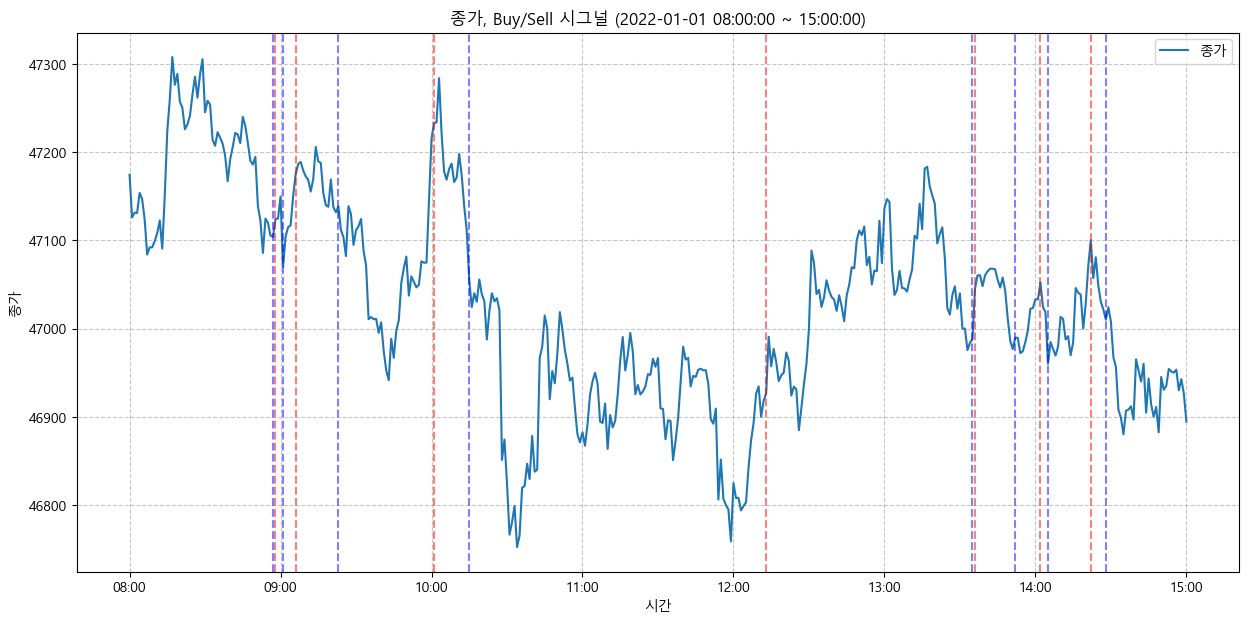

지정된 시간대의 총 데이터 포인트: 421
매수 신호 횟수: 7
매도 신호 횟수: 8


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.tight_layout()
plt.figure(figsize=(15, 7))
start_time = '2022-01-01 08:00:00'
end_time = '2022-01-01 15:00:00'
df_subset = df.loc[start_time:end_time]

plt.plot(df_subset.index, df_subset['close'], label='종가')
for idx, row in df_subset.iterrows():
    if row['algorithm'] == 'buy':
        plt.axvline(x=idx, color='red', linestyle='--', alpha=0.5)
    elif row['algorithm'] == 'sell':
        plt.axvline(x=idx, color='blue', linestyle='--', alpha=0.5)
buy_signals = df_subset[df_subset['algorithm'] == 'buy'].shape[0]
sell_signals = df_subset[df_subset['algorithm'] == 'sell'].shape[0]
        
# 그래프 스타일 설정
plt.title('종가, Buy/Sell 시그널 (2022-01-01 08:00:00 ~ 15:00:00)')
plt.xlabel('시간')
plt.ylabel('종가')
plt.legend()
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

print(f"지정된 시간대의 총 데이터 포인트: {df_subset.shape[0]}")
print(f"매수 신호 횟수: {buy_signals}")
print(f"매도 신호 횟수: {sell_signals}")

### 기계학습4
아래의 정의된 컬럼들로 result의 loss와 profit을 예측하는 모델을 만들려고 한다.

- open
- 시작가,종가 가격차이 (open - close)
- algorithm
- t분과 t-5시점의 close값의 차이 (t , t-5)

2022년 2월 ~ 12월까지의 데이터를 train  2023년 1~2월의 데이터를 평가 데이터로 하고 result의 값이 loss,profit인 데이터만 학습에 사용하여     
랜덤포레스트와 서포트 벡터머신 분류모델을 만들고 test데이터에 대해 accuracy를 비교하라. test데이터에 대한 예측 진행시 profit일 확률이 60%이상인 경우에만 profit으로 예측한다

### 유저의 카드사용 데이터

데이터 출처 :https://www.kaggle.com/datasets/arjunbhasin2013/ccdata     
dataurl ='./data/user_data.csv'

다음은 Credit Card 데이터셋의 데이터 사전 및 각 컬럼의 한글 번역입니다:

1. **CUST_ID**: 신용카드 보유자 식별

2. **BALANCE**: 계좌에 남아 있는 구매 가능 잔액

3. **BALANCE_FREQUENCY**: 잔액 업데이트 빈도, 0과 1 사이의 점수 (1 = 자주 업데이트됨, 0 = 자주 업데이트되지 않음)

4. **PURCHASES**: 계좌에서의 구매 금액

5. **ONEOFF_PURCHASES**: 한 번에 최대 구매 금액

6. **INSTALLMENTS_PURCHASES**: 할부로 구매한 금액

7. **CASH_ADVANCE**: 사용자가 미리 지급한 현금

8. **PURCHASES_FREQUENCY**: 구매 빈도, 0과 1 사이의 점수 (1 = 자주 구매함, 0 = 자주 구매하지 않음)

9. **ONEOFFPURCHASESFREQUENCY**: 일회성 구매 빈도 (1 = 자주 구매함, 0 = 자주 구매하지 않음)

10. **PURCHASESINSTALLMENTSFREQUENCY**: 할부 구매 빈도 (1 = 자주 구매함, 0 = 자주 구매하지 않음)

11. **CASHADVANCEFREQUENCY**: 현금 선지급 빈도 (1 = 자주 선지급함, 0 = 자주 선지급하지 않음)

12. **CASHADVANCETRX**: 현금 선지급으로 이루어진 거래 수

13. **PURCHASES_TRX**: 구매 거래 수

14. **CREDIT_LIMIT**: 사용자 신용카드의 한도

15. **PAYMENTS**: 사용자가 지불한 금액

16. **MINIMUM_PAYMENTS**: 사용자가 지불한 최소 금액

17. **PRCFULLPAYMENT**: 사용자가 지불한 전체 금액의 백분율

18. **TENURE**: 신용카드 서비스 사용 기간

In [16]:
import pandas as pd
df = pd.read_csv('../dataset/user_data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 기계학습
데이터 EDA를 실시하고 결측치와 이상치를 처리하라 (시각화 포함)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1541.029509,0.877271,936.073433,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4474.419279,1649.194511,844.906767,0.153715,11.517318
std,1966.529283,0.236904,1524.364224,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3551.263968,2250.469859,2332.792322,0.292499,1.338331
min,0.065248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,9337.094398,1.000000,8961.796200,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,17000.000000,13586.255763,76406.207520,1.000000,12.000000



결측치 개수:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

BALANCE의 이상치 개수: 695

PURCHASES의 이상치 개수: 808

CREDIT_LIMIT의 이상치 개수: 248

PAYMENTS의 이상치 개수: 808


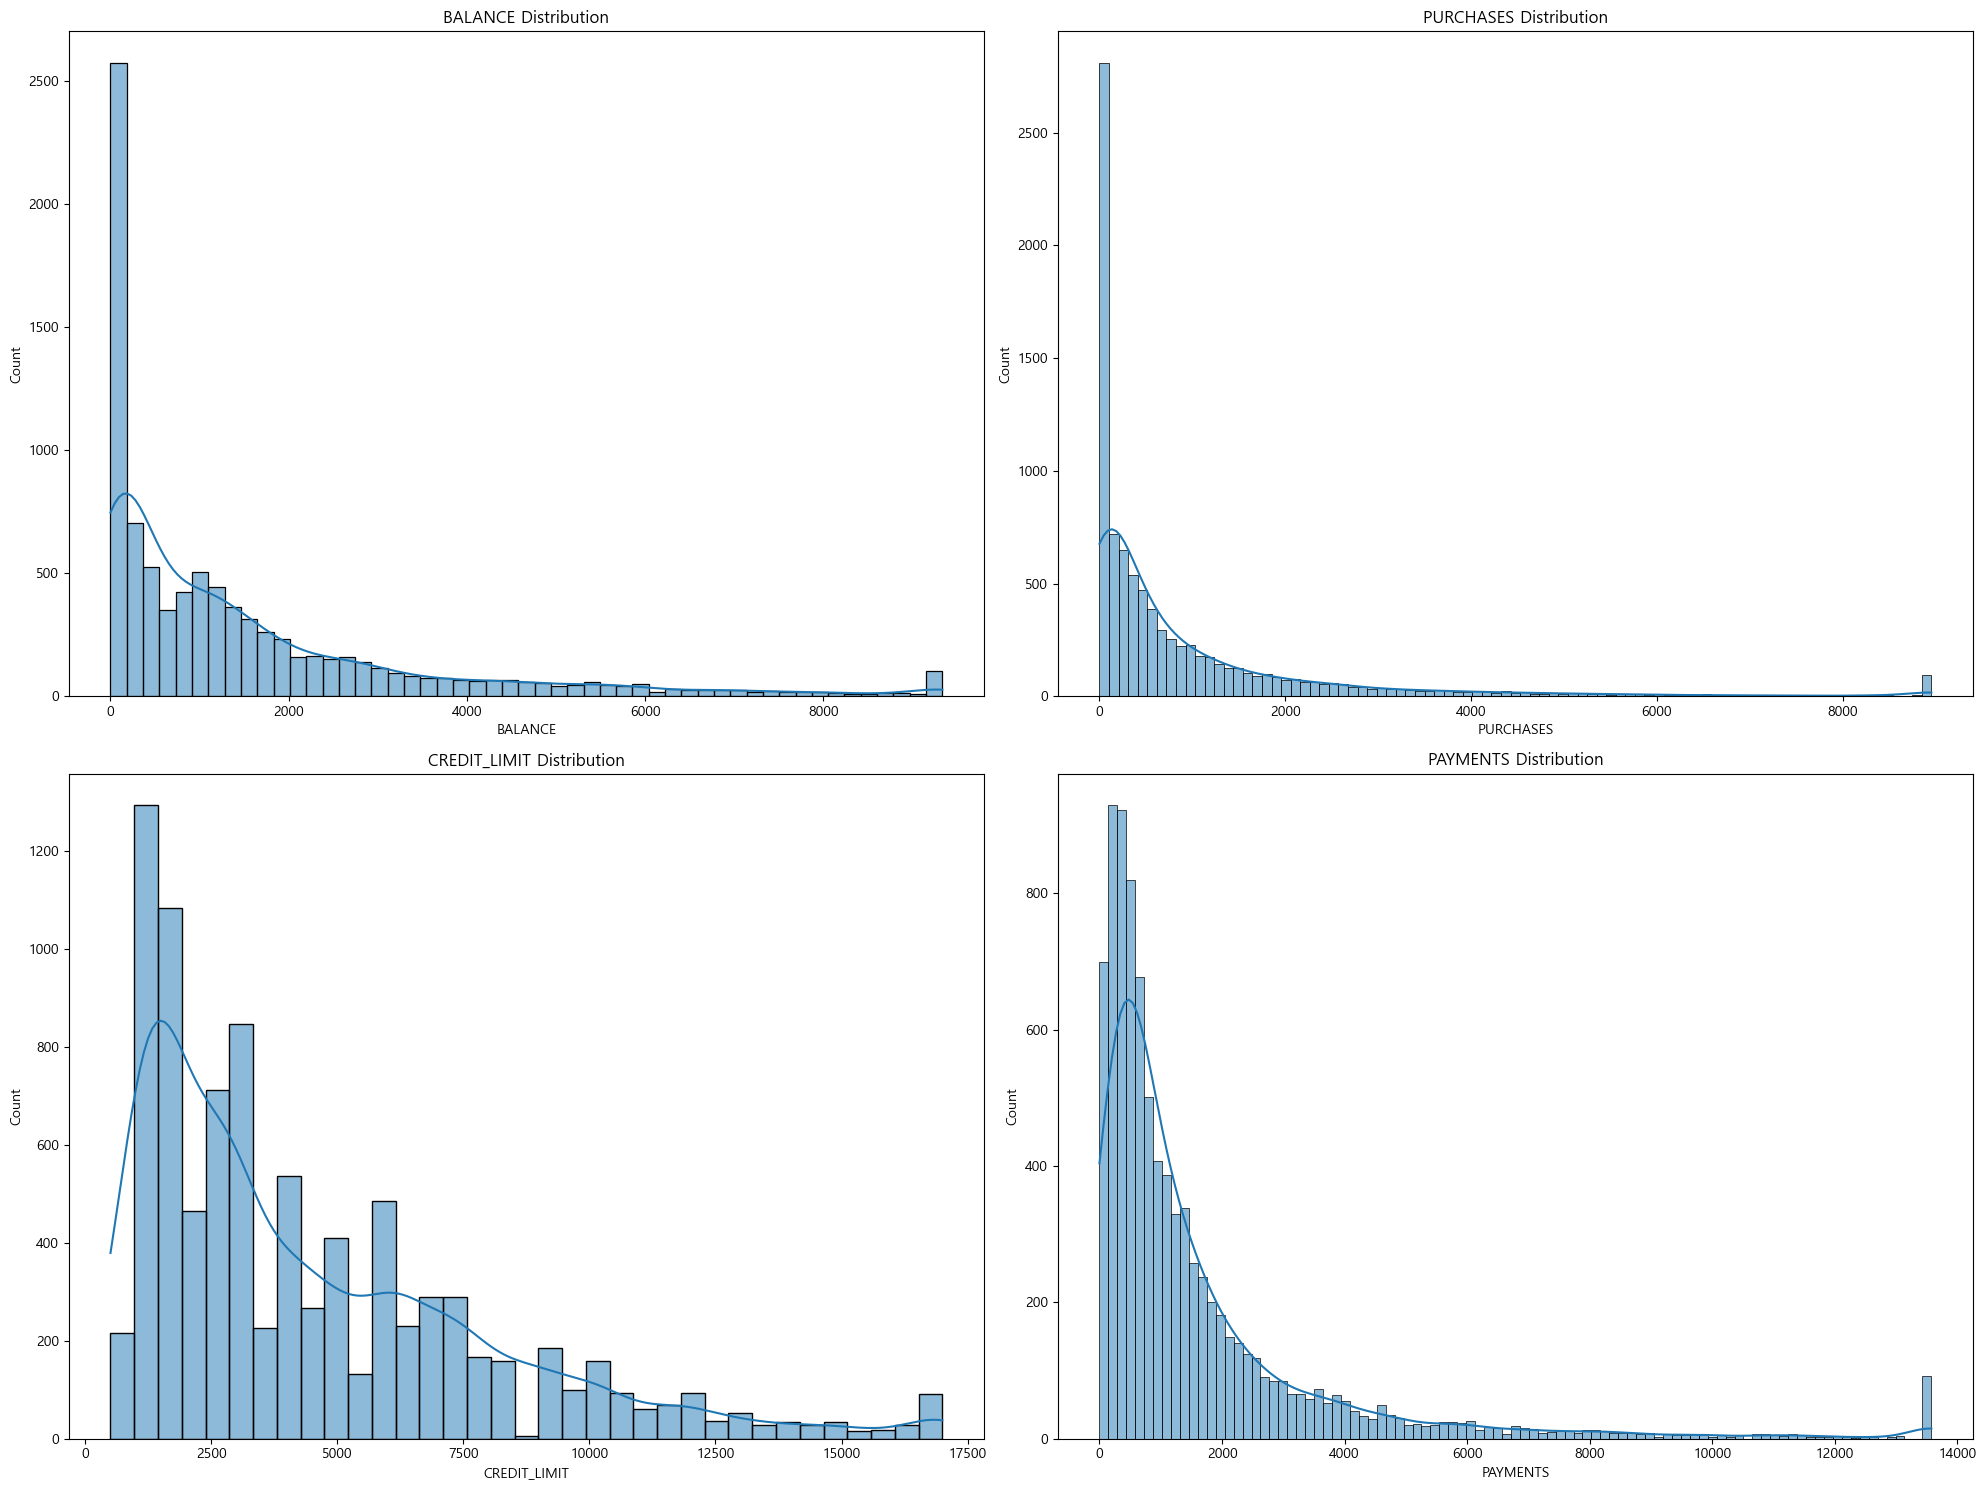

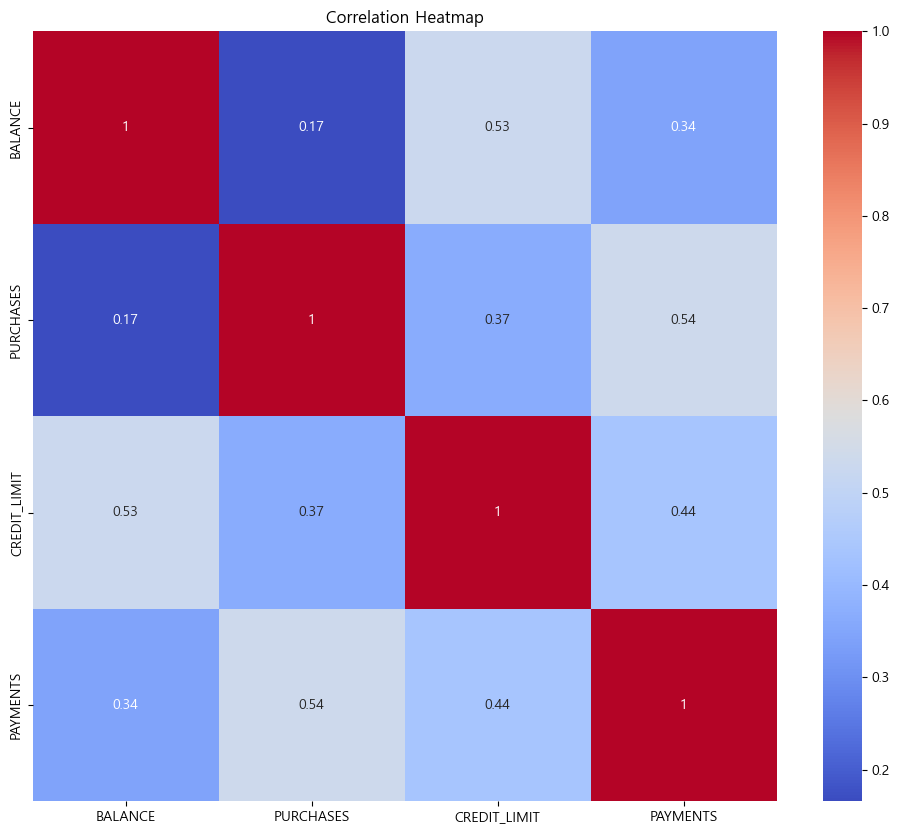

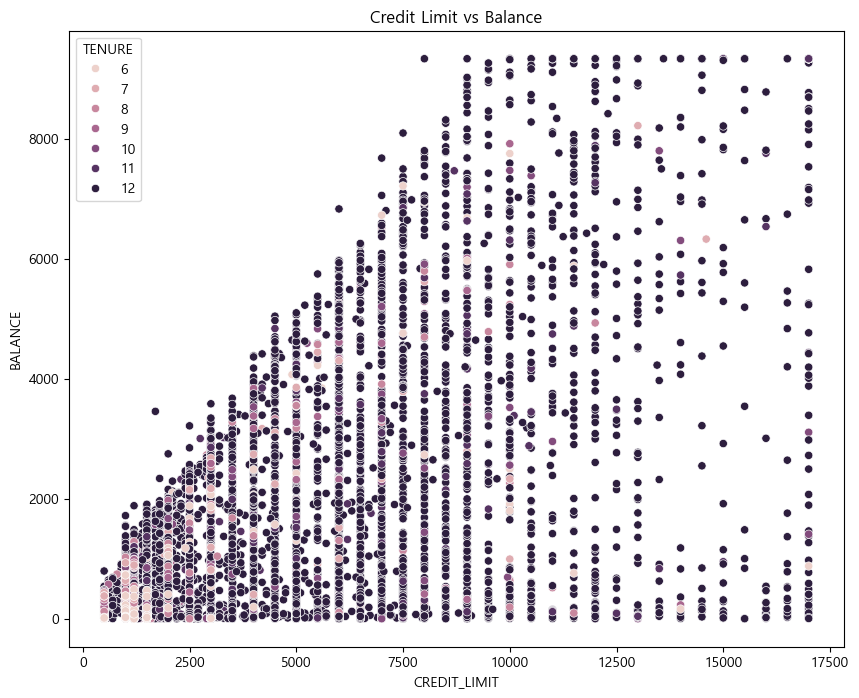


전처리 후 데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1541.020737,0.877271,935.993973,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4474.419279,1649.079327,844.906767,0.153715,11.517318
std,1966.494505,0.236904,1523.945971,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3551.263968,2249.859029,2332.792322,0.292499,1.338331
min,0.065324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,9336.222087,1.000000,8953.894362,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,17000.000000,13574.801277,76406.207520,1.000000,12.000000


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. 기본 정보 확인
print(df.info())
print("\n기술 통계량:")
display(df.describe())

# 2. 결측치 확인 및 처리
print("\n결측치 개수:")
print(df.isnull().sum())

# MINIMUM_PAYMENTS 열의 결측치를 중앙값으로 대체
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

# 3. 이상치 탐지 및 처리
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# 주요 수치형 변수에 대해 이상치 탐지
numerical_columns = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']
for col in numerical_columns:
    outliers = detect_outliers(df, col)
    print(f"\n{col}의 이상치 개수: {len(outliers)}")

# 이상치 처리 (예: 상하위 1% 제거)
for col in numerical_columns:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

# 4. 시각화
plt.figure(figsize=(20, 15))

# 히스토그램
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

# 상관관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 산점도
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='BALANCE', hue='TENURE')
plt.title('Credit Limit vs Balance')
plt.show()


# 5. 최종 데이터셋 기본 정보
print("\n전처리 후 데이터셋 정보:")
print(df.info())
print("\n전처리 후 기술 통계량:")
display(df.describe())

### 기계학습6     
PCA를 통해 적절한 차원으로 데이터를 축소하고 평가하라

### 기계학습7     
위의 차원 축소된 데이터를 바탕으로 KMeans 클러스터링을 실시하라.     
응집도와 분리도를 기반으로 적절 클러스터 숫자를 구하고 두개의 주성분 차원에 군집 중심을 포함하여 시각화하라

### 기계학습8   
마케팅 담당자인 당신은 KMeans 군집 결과를 통해 각 군집 특성을 파악하고 군집별 프로모션 전략을 서술하라
    

### 기계학습9
병합적 계층군집을 실시하고 덴드로그램을 시각화하라. 군집간 거리는 ward 방식으로 업데이트하며 위 문제에서 구한 최적 군집이 만들어지 지기 위한 거리 범위를 구하라

# 통계 (40점)

### 통계1      
어느 자동차 회사의 본사에서 여러 지방 영업소에 내려보낸 43대의 새 차 중 11대에 불량 오디오가 설치되었다고 한다. 어느 영업소가 8대를 인수하였는데 이 중에서 오디오가 불량인 차가 적어도 2대 이상이 될 확률을 구하라.

### 통계2
data_path = ./data/stats_reg1.csv     
종속변수 : Target   
독립변수 : 다양한 센서데이터

In [5]:
import pandas as pd
df =pd.read_csv('./dataset/stats_reg1.csv')
df.head()

,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,Target
0,0.296120,-1.463515,-0.327662,0.005113,-0.702053,0.097078,-0.392108,0.261055,0.968645,2,3,1.475520,-0.363724,-0.503583,-1.464364,7.709164
1,1.579213,-0.234137,1.523030,-0.469474,0.647689,0.496714,-0.234153,0.767435,-0.138264,2,1,0.387250,0.907459,0.928492,0.938609,264.129513
2,-0.562467,0.707752,-0.626967,0.972554,1.770801,-0.703176,1.812449,0.632408,-0.034988,2,2,0.955285,-0.096463,-0.030130,2.166524,211.602064
3,1.496044,-1.778720,-0.773789,-0.055585,1.876796,1.355638,-1.244655,0.654366,0.413435,2,1,0.441394,0.352448,-0.467829,2.433214,273.654357
4,-0.759133,-0.525755,-0.599393,0.341756,-0.839722,2.189803,-2.123896,0.150394,-0.808298,1,2,0.991974,-0.562178,-0.176573,-0.068282,-158.208708


### 통계2-1
변수들의 다중공선성을 검토하라


### 통계2-2
다중공선성 문제를 해결하기 위한 방법 2가지를 제시하고, 하나를 선택하여 적용하라


### 통계2-3
2-2의 방법을 전,후의 회귀 분석 모델의 결과를 비교하라


### 통계 3     
data_path = ./data/stats_reg1.csv
- 어느 학급의 학생들이 3가지(Lecture,Online,Blended)방식으로 학습하고 시험을 본 결과이다.


### 통계 3-1
3가지 방식 각각 점수 분포가 정규성을 만족하는지와 방식들간의 분산은 동일한지 검정하라

### 통계 3-2
위 결과에 맞는 그룹간 점수 분포 차이가 존재하는지를 확인하는 통계 검정 전략을 설명하라

### 통계 3-3
가설에 따른 검정을 수행하고, 검정통계량과 p-value를 설명하라